In [273]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [274]:
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Chargement du dataset

In [275]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\donovan\\.keras\\datasets\\auto-mpg.data'

In [276]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Traitement de la data

In [277]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [278]:
dataset = dataset.dropna()

In [279]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


# Trainset et Testset

In [280]:
#train_dataset = dataset.sample(frac=0.8,random_state=0)
#test_dataset = dataset.drop(train_dataset.index)


from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(train_dataset, test_size = 0.2)

# Visualisation des graphs

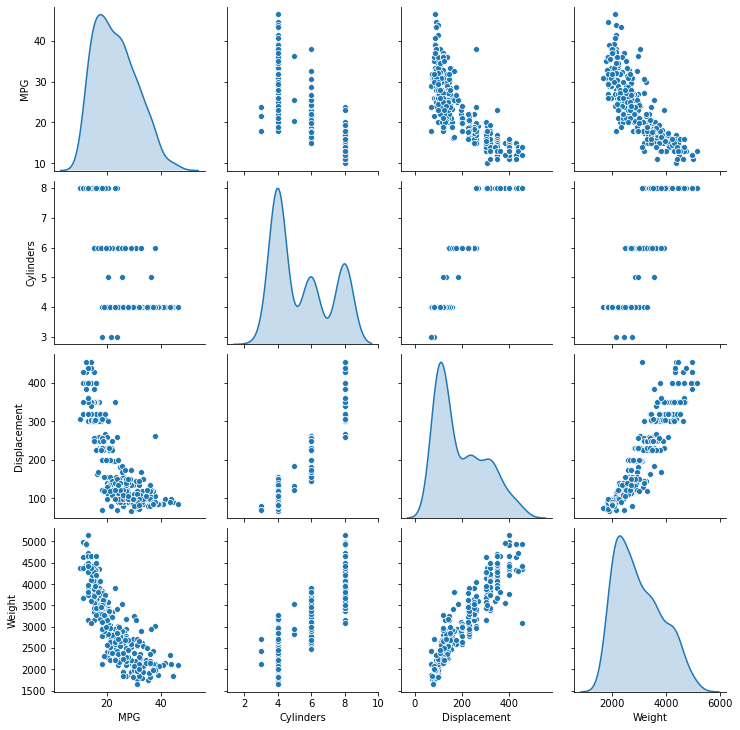

In [281]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [282]:
train_stats = x_train.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,251.0,5.370518,1.657156,3.0,4.0,4.0,6.0,8.0
Displacement,251.0,189.792829,102.438728,68.0,105.0,146.0,258.0,455.0
Horsepower,251.0,103.521912,38.655330,46.0,76.0,92.0,115.0,225.0
Weight,251.0,2944.908367,816.296537,1649.0,2249.0,2789.0,3457.0,5140.0
Acceleration,251.0,15.648606,2.831513,8.0,14.0,15.5,17.3,24.8
Model Year,251.0,76.043825,3.724791,70.0,73.0,76.0,79.0,82.0
Europe,251.0,0.167331,0.374017,0.0,0.0,0.0,0.0,1.0
Japan,251.0,0.223108,0.417162,0.0,0.0,0.0,0.0,1.0
USA,251.0,0.609562,0.488823,0.0,0.0,1.0,1.0,1.0


In [283]:
# le but et de determiner le MPG
y_train = x_train.pop('MPG')
y_test = x_test.pop('MPG')

# Normalisation de la data

In [284]:
x_train = (x_train - train_stats['mean']) / train_stats['std']
x_test = (x_test - train_stats['mean']) / train_stats['std']

# Creation du model

In [285]:
 model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

In [286]:
model.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mae', 'mse'])

In [287]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


# Entrainement du model

In [288]:
history = model.fit(x_train, 
                    y_train,
                    epochs=1000, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:596.9885,  mae:23.0424,  mse:596.9885,  val_loss:559.2241,  val_mae:22.3446,  val_mse:559.2241,  
....................................................................................................
Epoch: 100, loss:6.3855,  mae:1.8206,  mse:6.3855,  val_loss:6.8548,  val_mae:1.8067,  val_mse:6.8548,  
....................................................................................................
Epoch: 200, loss:5.5364,  mae:1.6813,  mse:5.5364,  val_loss:8.7854,  val_mae:2.1840,  val_mse:8.7854,  
....................................................................................................
Epoch: 300, loss:4.9338,  mae:1.5708,  mse:4.9338,  val_loss:6.8688,  val_mae:1.8392,  val_mse:6.8688,  
....................................................................................................
Epoch: 400, loss:4.4697,  mae:1.4298,  mse:4.4697,  val_loss:7.1479,  val_mae:1.8639,  val_mse:7.1479,  
..............................................................

# Courbe d'apprentissage

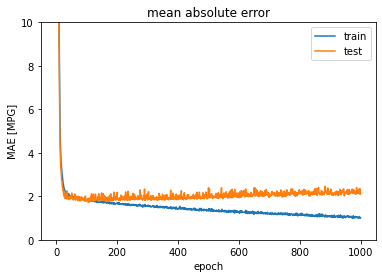

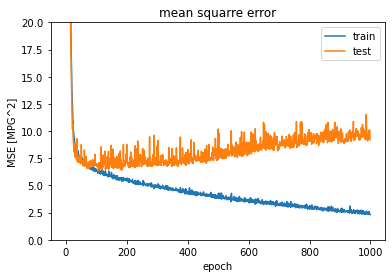

In [289]:
# summarize history for accuracy
plt.plot(history.history['mae'], label="train")
plt.plot(history.history['val_mae'], label="test")
plt.title('mean absolute error')
plt.ylim([0,10])
plt.ylabel('MAE [MPG]')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['mse'], label="train")
plt.plot(history.history['val_mse'], label="test")
plt.title('mean squarre error')
plt.ylabel('MSE [MPG^2]')
plt.xlabel('epoch')
plt.ylim([0,20])
plt.legend()
plt.show()
# mae = mean absolute error
# mse = mean squarre error
#ici on voit qu a prtir de 100 epochs cela stagne voir empire

# Nouveau model avec condition d'arret de l apprentissage

## REGULARISATION ET DECROCHAGE

In [290]:
 model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())],
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),                                                           
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),    
    tf.keras.layers.Dense(1)
  ])
    
model.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=['mae', 'mse'])

history = model.fit(x_train, 
                    y_train,
                    epochs=1000, 
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
                               tfdocs.modeling.EpochDots()])



Epoch: 0, loss:615.3617,  mae:23.5911,  mse:615.2819,  val_loss:575.1911,  val_mae:22.8592,  val_mse:575.1112,  
.............................................................................

# Courbe d'apprentissage

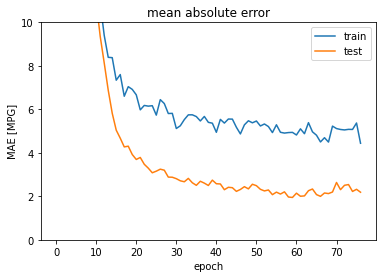

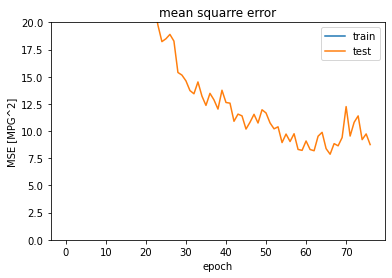

In [291]:
# summarize history for accuracy
plt.plot(history.history['mae'], label="train")
plt.plot(history.history['val_mae'], label="test")
plt.title('mean absolute error')
plt.ylim([0,10])
plt.ylabel('MAE [MPG]')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['mse'], label="train")
plt.plot(history.history['val_mse'], label="test")
plt.title('mean squarre error')
plt.ylabel('MSE [MPG^2]')
plt.xlabel('epoch')
plt.ylim([0,20])
plt.legend()
plt.show()
# mae = mean absolute error
# mse = mean squarre error
#ici on voit qu a prtir de 100 epochs cela stagne voir empire

# Evalutation du model

In [292]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

2/2 - 0s - loss: 9.4452 - mae: 2.1801 - mse: 9.3517


# Prediction

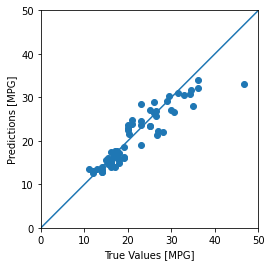

In [293]:
predictions = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
#le model predi plutot bien apparemment

# Enregistrer et charger son model

In [270]:
#save
model.save('monModelRegression.h5')

#load
model = tf.keras.models.load_model('monModelRegression.h5')